In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
!pip install squarify
import squarify 

In [6]:
raw_lott = pd.read_csv('Raw_Lottery_202301012045.csv')
raw_bonus = pd.read_csv('Raw_Bonus_202301012045.csv')

#raw_lott.head()
raw_bonus.head()

,id,num1,num2,num3,num4,num5,num6
0,1,2,7,8,2,3,9
1,2,1,5,4,4,5,7
2,3,0,5,9,3,6,9
3,4,2,2,1,0,9,7
4,5,1,9,0,7,7,9


In [5]:
# 기준모델
raw_lott.mode()

,id,num1,num2,num3,num4,num5,num6,num7
0,1,4.0,5.0,3.0,9.0,0.0,5.0,6.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_lott.describe()

,id,num1,num2,num3,num4,num5,num6,num7
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,2.978417,4.532374,4.489209,4.798561,4.115108,4.546763,4.812950
std,40.269923,1.441957,2.774893,2.939898,3.048354,2.939188,2.716624,2.796396
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,70.000000,3.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
75%,104.500000,4.000000,7.000000,7.000000,7.000000,6.500000,7.000000,7.000000
max,139.000000,5.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
# 얘는 왜 이렇게 나오지?
raw_bonus.mode()

,num1,num2,num3,num4,num5,num6
0,0,6.0,1.0,2,1.0,0.0
1,4,NaN,4.0,6,NaN,NaN
2,9,NaN,NaN,9,NaN,NaN


In [8]:
raw_bonus.duplicated()

id
1      False
2      False
3      False
4      False
5      False
       ...  
135    False
136    False
137    False
138    False
139    False
Length: 139, dtype: bool

In [9]:
raw_bonus.isna().sum()

num1    0
num2    0
num3    0
num4    0
num5    0
num6    0
dtype: int64

In [10]:
# 버젼 3개? 
# 1. 주 번호만 
# 2. 보너스 번호만 
# 3. 주 + 보너스 번호

(array([ 1.,  4., 14., 12., 20., 34., 29., 16.,  6.,  3.]),
 array([11. , 14.6, 18.2, 21.8, 25.4, 29. , 32.6, 36.2, 39.8, 43.4, 47. ]),
 <BarContainer object of 10 artists>)

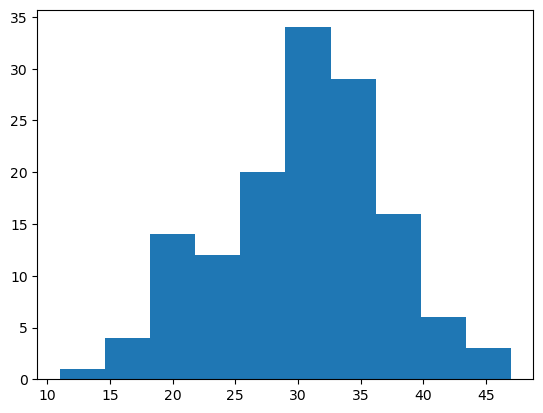

In [11]:
# 기본 번호 컬럼을 전부 합하면? 
sum_lott = raw_lott.num1+raw_lott.num2+raw_lott.num3+raw_lott.num4+raw_lott.num5+raw_lott.num6+raw_lott.num7
sum_lott # Series Type

# 기본 번호들을 전부 합한 값들의 분포. 
plt.hist(sum_lott)

(array([ 1.,  8., 11., 25., 24., 22., 25., 14.,  4.,  5.]),
 array([ 8. , 11.8, 15.6, 19.4, 23.2, 27. , 30.8, 34.6, 38.4, 42.2, 46. ]),
 <BarContainer object of 10 artists>)

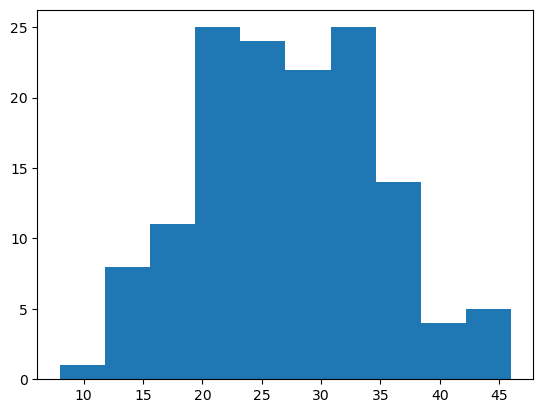

In [12]:
# 보너스 번호 컬럼 합.
sum_bonu = raw_bonus.num1+raw_bonus.num2+raw_bonus.num3+raw_bonus.num4+raw_bonus.num5+raw_bonus.num6
sum_bonu # Series Type

# 보너스 번호들을 전부 합한 값들의 분포. 
plt.hist(sum_bonu)

In [13]:
# 기본번호를 일곱자리 숫자로 
lott7 = raw_lott.num1.astype(str)+raw_lott.num2.astype(str)+raw_lott.num3.astype(str)+raw_lott.num4.astype(str)+raw_lott.num5.astype(str)+raw_lott.num6.astype(str)+raw_lott.num7.astype(str)
lott7

0      4162132
1      2450558
2      4544955
3      4124420
4      4754655
        ...   
134    2400876
135    5587411
136    1873784
137    1393066
138    1201688
Length: 139, dtype: object

In [14]:
# 보너스를 여섯자리 숫자로
bonus6 = raw_bonus.num1.astype(str)+raw_bonus.num2.astype(str)+raw_bonus.num3.astype(str)+raw_bonus.num4.astype(str)+raw_bonus.num5.astype(str)+raw_bonus.num6.astype(str)
bonus6

id
1      278239
2      154457
3      059369
4      221097
5      190779
        ...  
135    480190
136    430827
137    609795
138    269254
139    056960
Length: 139, dtype: object

In [15]:
new_bonus6 = raw_lott.num2.astype(str)+raw_lott.num3.astype(str)+raw_lott.num4.astype(str)+raw_lott.num5.astype(str)+raw_lott.num6.astype(str)+raw_lott.num7.astype(str)
new_bonus6

0      162132
1      450558
2      544955
3      124420
4      754655
        ...  
134    400876
135    587411
136    873784
137    393066
138    201688
Length: 139, dtype: object

In [16]:
# 6자리 숫자끼리 합치기.
test = pd.DataFrame(new_bonus6)
test2 = pd.DataFrame(bonus6)

final_bonus6 = pd.concat([test, test2])
final_bonus6 = final_bonus6.reset_index()

In [18]:
# final_bonus6.drop('id', axis=1, inplace=True)
# final_bonus6

In [19]:
# 그렇구나 복원 추출이니까 6개 숫자의 합이 9가 나올 수도 있고, 0이 될 수도 있다..!!
raw_lott.loc[51]

id      52
num1     2
num2     5
num3     9
num4     7
num5     2
num6     2
num7     7
Name: 51, dtype: int64

In [20]:
raw_lott

,id,num1,num2,num3,num4,num5,num6,num7
0,1,4,1,6,2,1,3,2
1,2,2,4,5,0,5,5,8
2,3,4,5,4,4,9,5,5
3,4,4,1,2,4,4,2,0
4,5,4,7,5,4,6,5,5
...,...,...,...,...,...,...,...,...
134,135,2,4,0,0,8,7,6
135,136,5,5,8,7,4,1,1
136,137,1,8,7,3,7,8,4
137,138,1,3,9,3,0,6,6


In [21]:
raw_lott.values.reshape(-1, 1)

array([[1],
       [4],
       [1],
       ...,
       [6],
       [8],
       [8]])

In [7]:
 #raw_lott.values.reshape(-1, 1)

In [23]:
import random
import numpy

rand_list_5 = []

for i in range(0, len(raw_lott)):
    rand = random.randrange(1, 5)
    rand_list_5.append(rand)
    
rand_list_5 = pd.DataFrame(rand_list_5)
rand_list_5.values.reshape(-1, 1)

array([[2],
       [1],
       [1],
       [2],
       [4],
       [1],
       [2],
       [2],
       [1],
       [4],
       [2],
       [4],
       [1],
       [1],
       [3],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [4],
       [3],
       [1],
       [4],
       [3],
       [2],
       [4],
       [2],
       [1],
       [3],
       [1],
       [4],
       [3],
       [1],
       [3],
       [3],
       [2],
       [4],
       [3],
       [3],
       [4],
       [1],
       [4],
       [4],
       [2],
       [3],
       [3],
       [1],
       [3],
       [1],
       [1],
       [1],
       [1],
       [3],
       [4],
       [1],
       [4],
       [2],
       [2],
       [3],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [1],
       [3],
       [4],
       [2],
       [3],
       [4],
       [1],
       [1],
       [1],
       [4],
       [4],
       [1],
       [1],
       [1],
       [4],
    

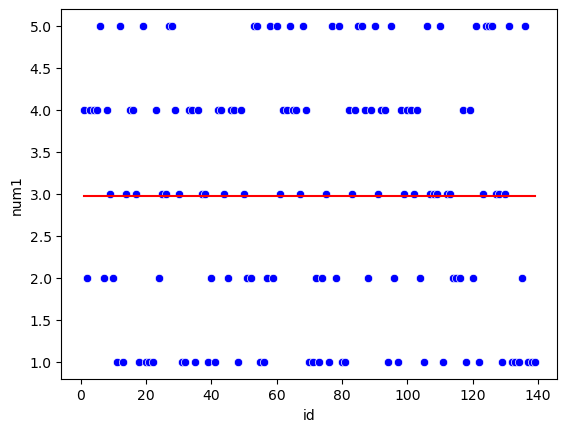

In [24]:
import seaborn as sns

x = raw_lott['id']
y = raw_lott['num1']

predict = raw_lott['num1'].mean()
errors = predict - raw_lott['num1']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [27]:
# rand_list = []

# pre_group = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num1'])
# ans_group = pre_group.predict([[len(raw_lott)]])   # ([['len(raw_lott)']])[0]
# ans_group

In [28]:
# 범위 이외의 값이 나온다. ex) -7.561225140234574 ..


# pre_num1 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num2'])
# ans_num1 = pre_group.predict([[len(raw_lott)]])[0]

# pre_num2 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num3'])
# ans_num2 = pre_group.predict([[len(raw_lott)]])[0]

# pre_num3 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num4'])
# ans_num3 = pre_group.predict([[len(raw_lott)]])[0]

# pre_num4 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num5'])
# ans_num4 = pre_group.predict([[len(raw_lott)]])[0]

# pre_num5 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num6'])
# ans_num5 = pre_group.predict([[len(raw_lott)]])[0]

# pre_num6 = LinearRegression()
# pre_group.fit(rand_list.values.reshape(-1, 1), raw_lott['num7'])
# ans_num6 = pre_group.predict([[len(raw_lott)+1]])[0]

In [ ]:
# 스샷용

In [ ]:
from sklearn.linear_model import LinearRegression

## 예측모델 인스턴스
pre_num1 = LinearRegression()

feature = ['id']
target1 = ['num1']

X_train = raw_lott[feature]
y_train1 = raw_lott[target1]


## 모델을 학습(fit)
pre_num1.fit(X_train, y_train1)


## 새로운 데이터 샘플로 성능 테스트
X_test = [[140]]
y_pred1 = round(float(pre_num1.predict(X_test)))

In [ ]:
####################### 메인 번호 ###########################

In [29]:
## 예측모델 인스턴스
from sklearn.linear_model import LinearRegression

pre_num1 = LinearRegression()
pre_num2 = LinearRegression()
pre_num3 = LinearRegression()
pre_num4 = LinearRegression()
pre_num5 = LinearRegression()
pre_num6 = LinearRegression()
pre_num7 = LinearRegression()


feature = ['id']

target1 = ['num1']
target2 = ['num2']
target3 = ['num3']
target4 = ['num4']
target5 = ['num5']
target6 = ['num6']
target7 = ['num7']


X_train = raw_lott[feature]

y_train1 = raw_lott[target1]
y_train2 = raw_lott[target2]
y_train3 = raw_lott[target3]
y_train4 = raw_lott[target4]
y_train5 = raw_lott[target5]
y_train6 = raw_lott[target6]
y_train7 = raw_lott[target7]

In [30]:
## 모델을 학습(fit)
pre_num1.fit(X_train, y_train1)
pre_num2.fit(X_train, y_train2)
pre_num3.fit(X_train, y_train3)
pre_num4.fit(X_train, y_train4)
pre_num5.fit(X_train, y_train5)
pre_num6.fit(X_train, y_train6)
pre_num7.fit(X_train, y_train7)

LinearRegression()

In [31]:
## 새로운 데이터 샘플
X_test = [[140]]

y_pred1 = round(float(pre_num1.predict(X_test)))
y_pred2 = round(float(pre_num2.predict(X_test)))
y_pred3 = round(float(pre_num3.predict(X_test)))
y_pred4 = round(float(pre_num4.predict(X_test)))
y_pred5 = round(float(pre_num5.predict(X_test)))
y_pred6 = round(float(pre_num6.predict(X_test)))
y_pred7 = round(float(pre_num7.predict(X_test)))

# 반올림
print(y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7)
# 3 5 4 5 5 5 4 - 140
#  - 1

3 5 4 5 5 5 4


/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/s

In [32]:
# 모델 피클화
import pickle

with open('model1.pkl', 'wb') as p_file:
    pickle.dump(pre_num1, p_file)
    
with open('model2.pkl', 'wb') as p_file:
    pickle.dump(pre_num2, p_file)
    
with open('model3.pkl', 'wb') as p_file:
    pickle.dump(pre_num3, p_file)
    
with open('model4.pkl', 'wb') as p_file:
    pickle.dump(pre_num4, p_file)
    
with open('model5.pkl', 'wb') as p_file:
    pickle.dump(pre_num5, p_file)
    
with open('model6.pkl', 'wb') as p_file:
    pickle.dump(pre_num6, p_file)
    
with open('model7.pkl', 'wb') as p_file:
    pickle.dump(pre_num7, p_file)
    

In [ ]:
####################### 보너스 번호 ###########################

In [9]:
## 예측모델 인스턴스
pre_bnum1 = LinearRegression()
pre_bnum2 = LinearRegression()
pre_bnum3 = LinearRegression()
pre_bnum4 = LinearRegression()
pre_bnum5 = LinearRegression()
pre_bnum6 = LinearRegression()


feature = ['id']

target1 = ['num1']
target2 = ['num2']
target3 = ['num3']
target4 = ['num4']
target5 = ['num5']
target6 = ['num6']

X_train = raw_bonus[feature]

y_train1 = raw_bonus[target1]
y_train2 = raw_bonus[target2]
y_train3 = raw_bonus[target3]
y_train4 = raw_bonus[target4]
y_train5 = raw_bonus[target5]
y_train6 = raw_bonus[target6]

In [10]:
## 모델을 학습(fit)
pre_bnum1.fit(X_train, y_train1)
pre_bnum2.fit(X_train, y_train2)
pre_bnum3.fit(X_train, y_train3)
pre_bnum4.fit(X_train, y_train4)
pre_bnum5.fit(X_train, y_train5)
pre_bnum6.fit(X_train, y_train6)

LinearRegression()

In [12]:
## 새로운 데이터 샘플
X_test = [[140]]

y_pred1 = round(float(pre_bnum1.predict(X_test)))
y_pred2 = round(float(pre_bnum2.predict(X_test)))
y_pred3 = round(float(pre_bnum3.predict(X_test)))
y_pred4 = round(float(pre_bnum4.predict(X_test)))
y_pred5 = round(float(pre_bnum5.predict(X_test)))
y_pred6 = round(float(pre_bnum6.predict(X_test)))


# 반올림
print(y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6)
# 3 5 4 5 5 5 4 - 140

5 5 4 5 4 4


/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/s

In [13]:
# 모델 피클화
import pickle

with open('b_model1.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum1, p_file)
    
with open('b_model2.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum2, p_file)
    
with open('b_model3.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum3, p_file)
    
with open('b_model4.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum4, p_file)
    
with open('b_model5.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum5, p_file)
    
with open('b_model6.pkl', 'wb') as p_file:
    pickle.dump(pre_bnum6, p_file)